Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading the data given

In [2]:
data = pd.read_csv(r"C:\Users\karun\Downloads\portfolio project 1\Intern\temperature (1) (1) (1).csv")
data.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


Analysing the data Statistics

In [3]:
data.describe()

,Data_Value
count,165085.000000
mean,95.422116
std,123.515131
min,-343.000000
25%,0.000000
50%,94.000000
75%,189.000000
max,406.000000


Data Inspection

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


Cheching for null value

In [5]:
data.isnull().sum()

ID            0
Date          0
Element       0
Data_Value    0
dtype: int64

In [6]:
data.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


Converting into degree c as the data given is tenth of degree c

In [7]:
data['Data_Value'] = data['Data_Value']/10
data

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,25.6
165081,USC00205822,2009-10-06,TMAX,16.7
165082,USC00205050,2014-07-14,TMAX,28.3
165083,USC00200230,2006-11-29,TMIN,11.7


Sorting the data in ascending order according to Data_Value

In [8]:
data_sorted = data.sort_values(by='Data_Value',ascending=True)
data_sorted

,ID,Date,Element,Data_Value
141374,USW00094889,2015-02-20,TMIN,-34.3
137824,USC00208972,2015-02-20,TMIN,-32.2
128105,USC00203712,2015-02-21,TMIN,-32.2
127333,USC00208972,2015-02-21,TMIN,-32.2
140515,USC00201502,2015-02-20,TMIN,-31.7
...,...,...,...,...
95834,USW00014853,2011-07-21,TMAX,39.4
150494,USW00014853,2012-07-04,TMAX,40.0
143703,USW00014853,2012-06-28,TMAX,40.6
130948,USW00014853,2012-07-17,TMAX,40.6


3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization. 

Removing the feb 29 as it is not present in every year

In [9]:
data_sorted['Date'] = pd.to_datetime(data_sorted['Date'])

data_filtered = data_sorted[data_sorted['Date'].dt.month !=2 | (data_sorted['Date'].dt.day !=29)]

data_filtered

,ID,Date,Element,Data_Value
141374,USW00094889,2015-02-20,TMIN,-34.3
137824,USC00208972,2015-02-20,TMIN,-32.2
128105,USC00203712,2015-02-21,TMIN,-32.2
127333,USC00208972,2015-02-21,TMIN,-32.2
140515,USC00201502,2015-02-20,TMIN,-31.7
...,...,...,...,...
95834,USW00014853,2011-07-21,TMAX,39.4
150494,USW00014853,2012-07-04,TMAX,40.0
143703,USW00014853,2012-06-28,TMAX,40.6
130948,USW00014853,2012-07-17,TMAX,40.6


1. Familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded. 

Filtering out the data based on year 2005 to 2014

In [10]:
data_filtered['Year'] = data_filtered['Date'].dt.year
data_filtered['Day_of_Year'] = data_filtered['Date'].dt.dayofyear
data_years = data_filtered[(data_filtered['Year'] >=2005)& (data_filtered['Year']<=2014)]
data_years


C:\Users\karun\AppData\Local\Temp\ipykernel_9684\142782171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Year'] = data_filtered['Date'].dt.year
C:\Users\karun\AppData\Local\Temp\ipykernel_9684\142782171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Day_of_Year'] = data_filtered['Date'].dt.dayofyear


,ID,Date,Element,Data_Value,Year,Day_of_Year
67128,USW00094889,2014-02-12,TMIN,-28.8,2014,43
115785,USW00094889,2009-02-05,TMIN,-28.2,2009,36
87435,USC00207308,2014-02-12,TMIN,-27.8,2014,43
69617,USC00201502,2014-02-12,TMIN,-27.2,2014,43
79538,USC00205050,2014-02-12,TMIN,-27.2,2014,43
...,...,...,...,...,...,...
95834,USW00014853,2011-07-21,TMAX,39.4,2011,202
150494,USW00014853,2012-07-04,TMAX,40.0,2012,186
143703,USW00014853,2012-06-28,TMAX,40.6,2012,180
130948,USW00014853,2012-07-17,TMAX,40.6,2012,199


In [11]:
temperature = data_years.groupby('Day_of_Year')['Data_Value'].agg(['max','min']).reset_index()
temperature

,Day_of_Year,max,min
0,32,15.0,-21.1
1,33,10.6,-21.1
2,34,8.9,-23.2
3,35,11.7,-26.1
4,36,12.2,-28.2
...,...,...,...
330,362,18.9,-13.8
331,363,19.4,-16.6
332,364,12.8,-15.0
333,365,13.9,-14.4


4. Consider issues such as legends, labels, and chart junk. 

Plotting the data to show the Recorded high and low temperatur in the year 2005 to 2014 and in between gap is filled with low shading color gray

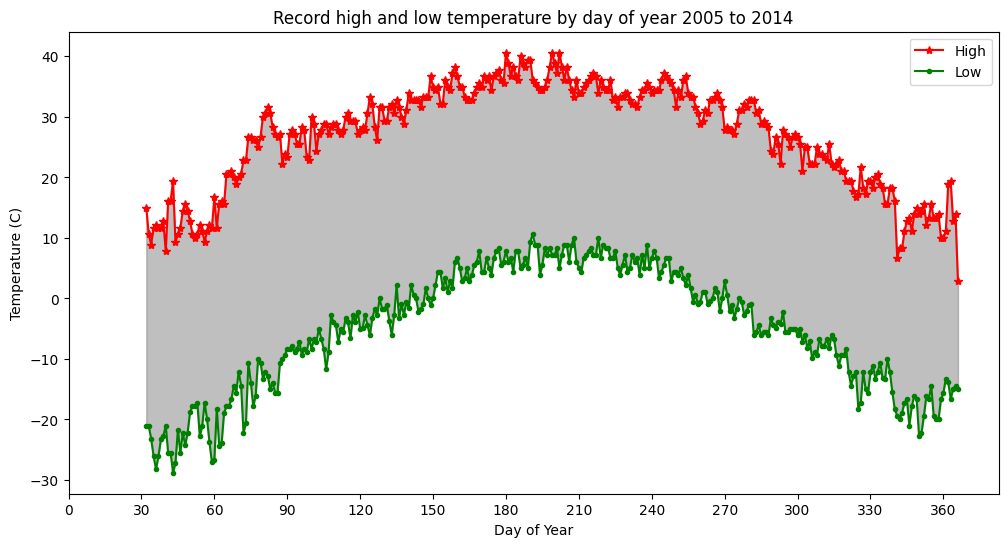

In [45]:
plt.figure(figsize=(12,6))
plt.plot('Day_of_Year','max',data=temperature, label='High', color='red', marker='*', linestyle='-')
plt.plot('Day_of_Year','min',data=temperature, label='Low', color='green', marker='.', linestyle='-')
plt.fill_between('Day_of_Year','max','min',data=temperature,color='gray',alpha=0.5)
plt.title('Record high and low temperature by day of year 2005 to 2014')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (C)')
plt.xticks(range(0,365,30))
plt.legend()
plt.show()


2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015

Taking out the data based on the year 2015 for further analysis

In [13]:
data_2015 = data_filtered[data_filtered['Year']==2015]
data_2015

,ID,Date,Element,Data_Value,Year,Day_of_Year
141374,USW00094889,2015-02-20,TMIN,-34.3,2015,51
137824,USC00208972,2015-02-20,TMIN,-32.2,2015,51
128105,USC00203712,2015-02-21,TMIN,-32.2,2015,52
127333,USC00208972,2015-02-21,TMIN,-32.2,2015,52
140515,USC00201502,2015-02-20,TMIN,-31.7,2015,51
...,...,...,...,...,...,...
103262,USC00205822,2015-07-29,TMAX,34.4,2015,210
107030,USW00014853,2015-07-28,TMAX,35.0,2015,209
57105,USW00014853,2015-09-07,TMAX,35.0,2015,250
74959,USW00014853,2015-08-02,TMAX,35.6,2015,214


In [14]:
temp_2015 = data_2015.groupby('Day_of_Year')['Data_Value'].agg(['max','min']).reset_index()
temp_2015

,Day_of_Year,max,min
0,32,3.9,-12.2
1,33,-2.2,-19.3
2,34,-2.1,-23.8
3,35,1.1,-21.1
4,36,1.1,-27.7
...,...,...,...
329,361,8.3,-0.6
330,362,6.1,-3.9
331,363,10.0,-3.9
332,364,6.7,-2.2


In [28]:
merge_2015 = pd.merge(temp_2015,temperature,on='Day_of_Year',suffixes=('_2015','_record'))

brkn_hig = merge_2015[merge_2015['max_2015']>merge_2015['max_record']]
brkn_lw = merge_2015[merge_2015['min_2015']<merge_2015['min_record']]
merge_2015

,Day_of_Year,max_2015,min_2015,max_record,min_record
0,32,3.9,-12.2,15.0,-21.1
1,33,-2.2,-19.3,10.6,-21.1
2,34,-2.1,-23.8,8.9,-23.2
3,35,1.1,-21.1,11.7,-26.1
4,36,1.1,-27.7,12.2,-28.2
...,...,...,...,...,...
329,361,8.3,-0.6,11.1,-13.3
330,362,6.1,-3.9,18.9,-13.8
331,363,10.0,-3.9,19.4,-16.6
332,364,6.7,-2.2,12.8,-15.0


Plotting the broken temperature highs and lows in the year 2015 only

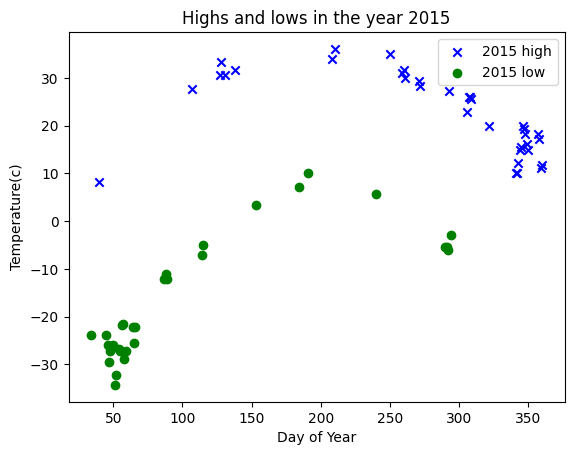

In [16]:
plt.scatter('Day_of_Year','max_2015',data=brkn_hig,color='blue',label='2015 high',marker='x')
plt.scatter('Day_of_Year','min_2015',data=brkn_lw,color='green',label='2015 low',marker='o')
plt.xlabel('Day of Year')
plt.ylabel('Temperature(c)')
plt.title('Highs and lows in the year 2015')
plt.legend()
plt.show()


In [77]:
plt.savefig('temp2_plot.png')

<Figure size 640x480 with 0 Axes>

Reading the second data set given

In [17]:
data2 = pd.read_csv(r"C:\Users\karun\Downloads\portfolio project 1\Intern\BinSize (1) (1) (1).csv")
data2.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...


Analysing the data in Statistics way

In [18]:
data2.describe()

,LATITUDE,LONGITUDE,ELEVATION,WMOID,x,y
count,18259.000000,18259.000000,18259.000000,6171.000000,1.825900e+04,1.825900e+04
mean,36.862167,-54.090018,582.410685,58389.632799,-4.328554e+06,4.098892e+06
std,22.016258,81.612630,713.235554,26847.030026,6.932991e+06,2.448100e+06
min,-90.000000,-179.983000,-999.900000,1001.000000,-1.922509e+07,-1.000756e+07
25%,34.411800,-110.100000,88.000000,34318.000000,-8.820602e+06,3.826423e+06
50%,41.109200,-88.190600,281.000000,67315.000000,-7.363517e+06,4.571141e+06
75%,47.531100,5.226550,806.100000,74504.000000,3.517924e+05,5.285225e+06
max,82.516700,179.320000,4701.000000,98851.000000,1.970828e+07,9.175451e+06


Inspecting the data

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18259 non-null  object 
 1   LATITUDE   18259 non-null  float64
 2   LONGITUDE  18259 non-null  float64
 3   ELEVATION  18259 non-null  float64
 4   STATE      12807 non-null  object 
 5   NAME       18259 non-null  object 
 6   GSNFLAG    927 non-null    object 
 7   HCNFLAG    1382 non-null   object 
 8   WMOID      6171 non-null   float64
 9   x          18259 non-null  float64
 10  y          18259 non-null  float64
 11  x_group    18258 non-null  object 
 12  y_group    18259 non-null  object 
 13  xy_group   18259 non-null  object 
 14  hash       18259 non-null  object 
dtypes: float64(6), object(9)
memory usage: 2.1+ MB


Finding the null Values

In [20]:
data2.isnull().sum()

ID               0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
STATE         5452
NAME             0
GSNFLAG      17332
HCNFLAG      16877
WMOID        12088
x                0
y                0
x_group          1
y_group          0
xy_group         0
hash             0
dtype: int64

5. The data you have been given is near **Ann Arbor, Michigan, United States**, and visualize on map the stations the data.

Taking out the data contains Ann Arbor only

In [21]:
ann_arbor_data = data2[data2['NAME'].str.contains('Ann Arbor',case=False,na=False)]
ann_arbor_data

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
10004,USC00200220,42.2875,-83.7611,263.7,MI,ANN ARBOR 1W,NaN,NaN,NaN,-6.890160e+06,4.702162e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10005,USC00200228,42.2417,-83.6933,253.6,MI,ANN ARBOR SE,NaN,NaN,NaN,-6.889586e+06,4.697069e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10006,USC00200230,42.2947,-83.7108,274.3,MI,ANN ARBOR U OF MICH,NaN,HCN,NaN,-6.885235e+06,4.702963e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
18098,USW00094889,42.2228,-83.7444,255.7,MI,ANN ARBOR MUNI AP,NaN,NaN,NaN,-6.895857e+06,4.694968e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...


Taking out the data containing Michigan

In [22]:
michigan_data = data2[data2['NAME'].str.contains('michigan',case=False,na=False)]
michigan_data

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
10145,USC00205662,43.5858,-84.7694,242.3,MI,CENTRAL MICHIGAN UNIV,NaN,HCN,NaN,-6.827612e+06,4.846527e+06,-6863743.9671962075 to -6766410.538479841,4816267.478767622 to 4913600.907483988,"-6863743.9671962075 to -6766410.538479841, 481...",12b8f39517e068eefa93895e4c0245244b7972ec91410a...
10152,USC00206012,44.8831,-85.6753,249.9,MI,NW MICHIGAN RSCH FM,NaN,NaN,NaN,-6.750105e+06,4.990780e+06,-6766410.538479842 to -6669077.109763476,4913600.9074839875 to 5010934.336200354,"-6766410.538479842 to -6669077.109763476, 4913...",af65298617bc37aad34fb92188b896e86fd298d1307958...
15426,USR0000MBAL,43.8933,-85.8506,253.6,MI,BALDWIN MICHIGAN,NaN,NaN,NaN,-6.879274e+06,4.880719e+06,-6961077.395912573 to -6863743.967196207,4816267.478767622 to 4913600.907483988,"-6961077.395912573 to -6863743.967196207, 4816...",4c72fc54c47ec90d8a55e36f6522b9ab93d621c5519231...
15445,USR0000MBRR,44.8019,-86.0508,289.9,MI,BEAR MICHIGAN,NaN,NaN,NaN,-6.789251e+06,4.981751e+06,-6863743.9671962075 to -6766410.538479841,4913600.9074839875 to 5010934.336200354,"-6863743.9671962075 to -6766410.538479841, 491...",000d30c9537c5c655abbc6fade88f4e03bf457f937e719...
15466,USR0000MDOE,46.2536,-86.7142,248.4,MI,DOE LAKE MICHIGAN,NaN,NaN,NaN,-6.667265e+06,5.143173e+06,-6669077.109763477 to -6571743.681047111,5108267.764916718 to 5205601.193633084,"-6669077.109763477 to -6571743.681047111, 5108...",3f0ab6d8e32a3ffff92238f810e51d7095f85175c5a8a7...
15472,USR0000MELK,45.9536,-86.4053,219.5,MI,ELKHORN MICHIGAN,NaN,NaN,NaN,-6.679764e+06,5.109814e+06,-6766410.538479842 to -6669077.109763476,5108267.764916718 to 5205601.193633084,"-6766410.538479842 to -6669077.109763476, 5108...",94823e1fbf7b9f19ddcd7d27c7f994ab94d964f4353392...
15520,USR0000MMIO,44.6761,-84.1283,320.0,MI,MIO MICHIGAN,NaN,NaN,NaN,-6.652027e+06,4.967763e+06,-6669077.109763477 to -6571743.681047111,4913600.9074839875 to 5010934.336200354,"-6669077.109763477 to -6571743.681047111, 4913...",7dda9f3cddaa0fddbff1f0b512f982d88214d2cc4923ff...
15527,USR0000MOJI,48.1086,-88.5467,317.0,MI,OJIBWAY MICHIGAN,NaN,NaN,NaN,-6.574351e+06,5.349440e+06,-6669077.109763477 to -6571743.681047111,5302934.6223494485 to 5400268.051065815,"-6669077.109763477 to -6571743.681047111, 5302...",4cc8443b6611ac5cc12b581e7787ca84387257f746aee7...
15540,USR0000MRAC,46.2500,-84.5833,274.3,MI,RACO MICHIGAN,NaN,NaN,NaN,-6.503851e+06,5.142773e+06,-6571743.681047112 to -6474410.252330746,5108267.764916718 to 5205601.193633084,"-6571743.681047112 to -6474410.252330746, 5108...",72d28f7d39f56786bd088149453ba5306075ba0ff983f0...
15551,USR0000MSEN,46.2403,-85.9428,221.3,MI,SENEY MICHIGAN,NaN,NaN,NaN,-6.609556e+06,5.141694e+06,-6669077.109763477 to -6571743.681047111,5108267.764916718 to 5205601.193633084,"-6669077.109763477 to -6571743.681047111, 5108...",3f0ab6d8e32a3ffff92238f810e51d7095f85175c5a8a7...


Importing the library folium to create an interactive maps to  display the data

In [23]:
import folium

In [89]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


Plotting the michigan data in the map

In [24]:
michigan_coords = (46.2689,-89.1700)

map_michigan = folium.Map(location=michigan_coords,zoom_start=12)

folium.Marker(location=michigan_coords,popup='michigan,MI').add_to(map_michigan)
map_michigan

Plotting Ann Arbor in the map

In [25]:
ann_arbor_coords = (42.2808,-83.7430)

map_ann_arbor = folium.Map(location=ann_arbor_coords,zoom_start=12)

folium.Marker(location=ann_arbor_coords,popup='Ann Arbor,MI').add_to(map_ann_arbor)
map_ann_arbor

Mapping Ann Arbor ,Michgan in usa premises . The Red and Green marked are Ann Arbor and Michigan the blue circle is usa premises.

In [26]:
usa_map = folium.Map(location=[37.0902,-95.7129],zoom_start=4)

folium.Marker(
    location=[42.2808,-83.7430],
    popup='Ann Arbor,MI',
    icon=folium.Icon(color='red')
).add_to(usa_map)

folium.Circle(
    location=[39.8283,-98.5795],
    radius=1500000,
    color='blue',
    fill=True,
    fill_opacity=0.1,
    popup='United Sated of America'
).add_to(usa_map)

folium.Marker(
    location=[46.2689,-89.1700],
    popup='michigan,MI',
    icon = folium.Icon(color='green')
).add_to(usa_map)
usa_map

6. Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).

In [37]:
lat_min,lat_max = 41.28,43.28
lon_min,lon_max = -84.743, -82.743

ann_arbor_stations = data2[(data2['LATITUDE']>=lat_min) & (data2['LATITUDE']<=lat_max)&
                           (data2['LONGITUDE']>=lon_min) & (data2['LONGITUDE']<=lon_max)]


Merging the data  from the two tables, based on ID.

In [42]:
merged_data1 = pd.merge(data_2015,ann_arbor_stations,on='ID')

tmax_data = merged_data1[merged_data1['Element']=='TMAX']
tmin_data =merged_data1[merged_data1['Element']=='TMIN']

Plotting the tempreature summary of Ann Arbor Michigan And USA

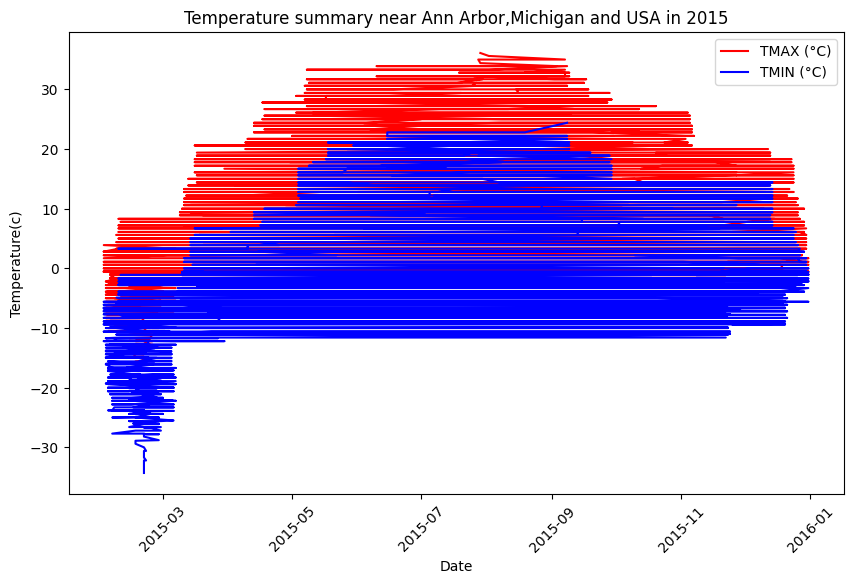

In [43]:
plt.figure(figsize=(10,6))
plt.plot(tmax_data['Date'], tmax_data['Data_Value'] , label='TMAX (°C)', color='r') 
plt.plot(tmin_data['Date'], tmin_data['Data_Value'] , label='TMIN (°C)', color='b')

plt.title('Temperature summary near Ann Arbor,Michigan and USA in 2015')
plt.xlabel('Date')
plt.ylabel('Temperature(c)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [44]:
plt.savefig('summary.png')

<Figure size 640x480 with 0 Axes>